DATASETS DESCRIPTION

In this project, I will use 2 datasets : 

1. Rating-Performance dataset from IPOScoop.com 
2. S&P 500 Index from Yahoo! Finance


STEPS OF THIS MACHINE LEARNING PROJECT

STEP 1 : Librairies and Datasets importation 


STEP 2 : Data Analysis and Data Visualization 


STEP 3 : Feature Engineering 


STEP 4 : Preprocessing 



STEP 5 : Training and Model Evaluation 


STEP 6 : Parameter Tuning


STEP 7 : Most important feature analysis 

STEP 1 : Librairies and Datasets importation 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from patsy import dmatrix
%matplotlib inline

In the code above, we imported different libraries we will use throughout the project. 


numpy : big scale numeric manipulation used with python. 


pandas : deep data analysis. 


matplotlib : simple data visualization tools (histograms for example). 


seaborn : deeper visualization tools (violinplot, heatmap...). 


sklearn : very large library from which we will use different types of tools : feature engineering, data preprocessing, linear models, more complex models, model evaluation... 

patsy : turn categorical data into numerical data. 

In [0]:
ipos = pd.read_csv('SCOOP-Rating-Performance.csv', encoding='latin-1')

We import our data via a CSV file. We use the filter encoding='latin-1' in order to avoid the UnicodeDecodeError. 

In [0]:
ipos.head()

,Date,Issuer,Symbol,Managers,Price,Price.1,Close,% Px Chng,Opening,Close.1,Ratings,Performance
0,1/8/19,MMTEC,MTC,WestPark Capital,"$4,00","$5,91","$7,55","88,75%","$1,91","$3,55",NaN,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,"$10,00","$10,00","$10,01","0,10%","$0,00","$0,01",1.0,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,"$20,00","$20,00","$20,20","1,00%","$0,00","$0,20",1.0,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,"$14,00","$13,25","$13,07","-6,64%","-$0,75","-$0,93",1.0,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,"$10,00","$10,05","$10,10","1,00%","$0,05","$0,10",1.0,NaN


In [0]:
ipos = ipos.rename(columns={" Managers": "Lead/Joint-Lead Mangager", "Price": "Offer Price", "Price.1": "Opening Price", 
                  "Close": "1st Day Close", "% Px Chng ": "1st Day % Px Chng ", "Opening": "$ Chg Opening", "Close.1": "$ Chg Close", 
                     "Ratings": "Star Ratings", "Performance": "Performed"})

Here we changed the name of the columns in order to be easier to follow. 

In [0]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,1/8/19,MMTEC,MTC,WestPark Capital,"$4,00","$5,91","$7,55","88,75%","$1,91","$3,55",NaN,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,"$10,00","$10,00","$10,01","0,10%","$0,00","$0,01",1.0,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,"$20,00","$20,00","$20,20","1,00%","$0,00","$0,20",1.0,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,"$14,00","$13,25","$13,07","-6,64%","-$0,75","-$0,93",1.0,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,"$10,00","$10,05","$10,10","1,00%","$0,05","$0,10",1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3410,12/8/00,Specialty Laboratories,SP,Merrill Lynch,"$16,00","$21,94","$23,31","45,70%","$5,94","$7,31",3.0,NaN
3411,12/8/00,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,"$20,00","$22,06","$24,50","22,50%","$2,06","$4,50",2.0,NaN
3412,12/11/00,Gemplus,GEMP,Credit Suisse First Boston,"$10,69","$12,00","$13,38","25,12%","$1,31","$2,69",1.0,NaN
3413,12/12/00,GenVec,GNVC,J.P. Morgan,"$9,50","$10,56","$9,88","3,95%","$1,06","$0,38",2.0,NaN


STEP 2 : Data analysis and Data Visualization 

In [0]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 12 columns):
Date                        3415 non-null object
Issuer                      3415 non-null object
Symbol                      3415 non-null object
Lead/Joint-Lead Mangager    3415 non-null object
Offer Price                 3415 non-null object
Opening Price               3415 non-null object
1st Day Close               3415 non-null object
1st Day % Px Chng           3414 non-null object
$ Chg Opening               3415 non-null object
$ Chg Close                 3415 non-null object
Star Ratings                3390 non-null float64
Performed                   389 non-null object
dtypes: float64(1), object(11)
memory usage: 320.3+ KB


Thanks to the info function, we got some information about our dataset. It contains 3415 rows for 12 columns. 11 columns have an object data types and some of them contain numeric values so there will be some preprocessing needed. 
We also have a date column with an object data type. One column (Star Ratings) has a float64 data type. 


2 columns contain null values with the column Performed getting a majority of null values, almost 90%. 

In [0]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,1/8/19,MMTEC,MTC,WestPark Capital,"4,00","5,91","7,55","88,75","1,91","3,55",NaN,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,"10,00","10,00","10,01","0,10","0,00","0,01",1.0,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,"20,00","20,00","20,20","1,00","0,00","0,20",1.0,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,"14,00","13,25","13,07","-6,64","-0,75","-0,93",1.0,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,"10,00","10,05","10,10","1,00","0,05","0,10",1.0,NaN


Here we got rid of special characters ($ and %) because our model are only able to compute numeric values. 

In [0]:
ipos.replace('N/C',0, inplace=True)
ipos[ipos['Date']=='11/120']

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
1549,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup","16,00","17,00","18,40","15,00","1,00","2,40",1.0,NaN


Before we turn the date object type into a date type we need to ensure that no date value is skewed. The value indexed at the 1549 rows is not correct (not in the classic date format month/day/year) so I need to modify it. 

In [0]:
ipos.loc[1549, 'Date'] = pd.to_datetime('2012-11-20')

In [0]:
ipos = ipos.applymap(lambda x: x if not ',' in str(x) else x.replace(',','.'))
ipos['Star Ratings'].replace(np.NaN, 0, inplace=True)
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,1/8/19,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,0.0,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,1.0,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,1.0,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,-0.75,-0.93,1.0,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,1.0,NaN


I used numpy in order to replace null values (NaN) by 0 in the Star Ratings Columns. 

In [0]:
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng '] = ipos['1st Day % Px Chng '].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

I can now map the whole Date column with a datetime type and the different numeric columns with a float type. For Star Ratings, the integer type is enough. 

In [0]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 12 columns):
Date                        3415 non-null datetime64[ns]
Issuer                      3415 non-null object
Symbol                      3415 non-null object
Lead/Joint-Lead Mangager    3415 non-null object
Offer Price                 3415 non-null float64
Opening Price               3415 non-null float64
1st Day Close               3415 non-null float64
1st Day % Px Chng           3414 non-null float64
$ Chg Opening               3415 non-null float64
$ Chg Close                 3415 non-null float64
Star Ratings                3415 non-null int64
Performed                   389 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 320.3+ KB


In [0]:
ipos.sort_values("Date", inplace=True)
ipos.reset_index(drop=True, inplace=True)
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.78,2.25,2.06,2,NaN
1,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.61,-0.13,-2.59,1,NaN
2,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.00,1.50,4.00,2,NaN
3,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.00,20.00,31.00,3,NaN
4,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.57,0.03,0.06,1,NaN


The Date column was ranked descending. For a better clarity and understanding, I decided to rank it ascending. It will also be easier later to split the dataset. 

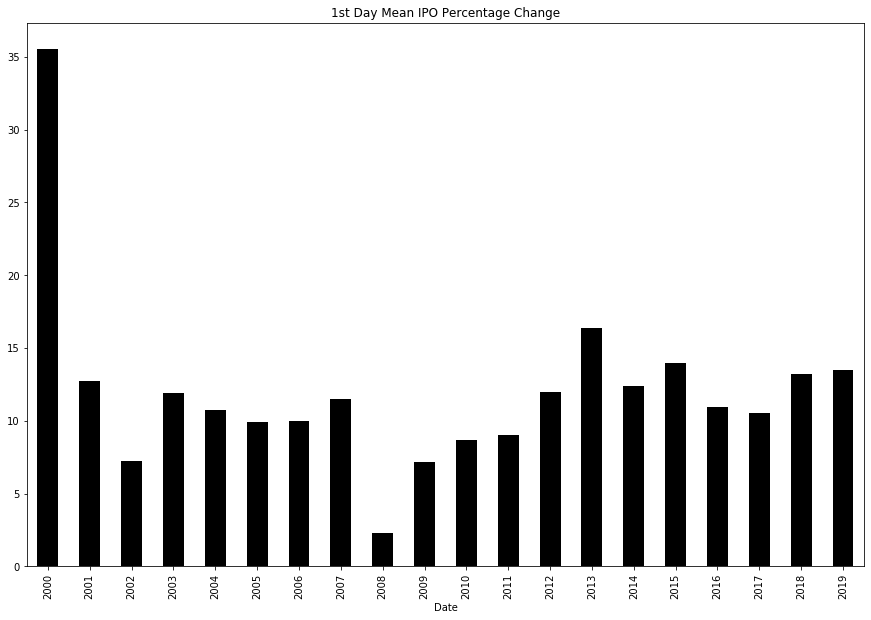

In [0]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

In this histogram, we can identify to massive drops in the 1st Day Mean IPO Percentage Change between 2000 and 2001 and 2007 and 2008. These two slumps are related to the two first financial crisis in the 21st Century (dot-com bubble and the subprimes crisis). 


Overall, despite these two extreme values, the histogram seems quite balanced. 

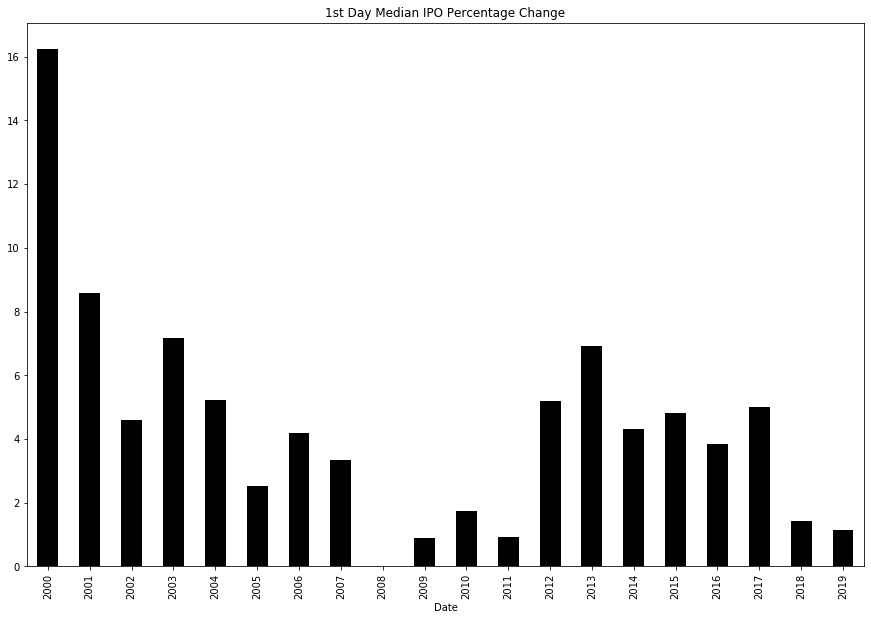

In [0]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

Here we identify the same phenomenon as above even though values are more scattered. 

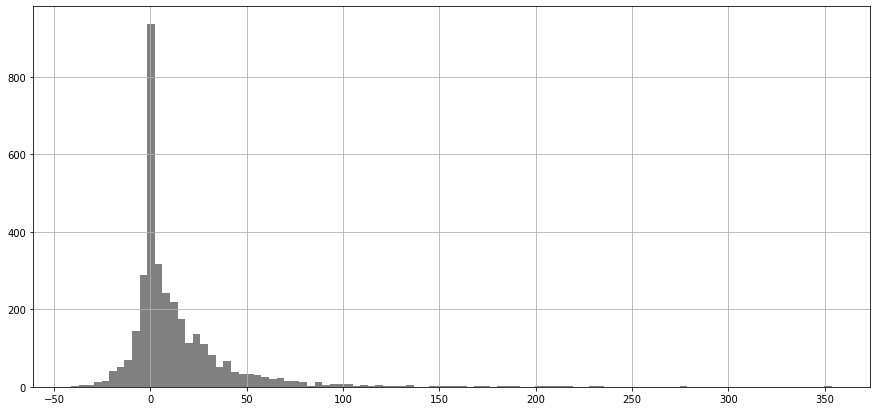

In [0]:
ipos['1st Day % Px Chng '].hist(figsize=(15,7), bins=100, color='grey')

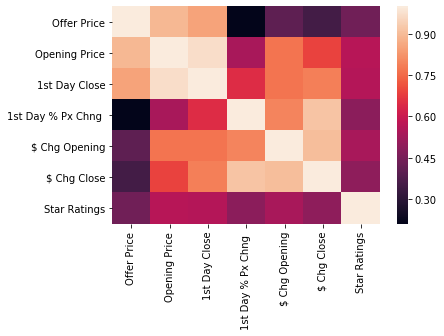

In [0]:
corr_matrix = ipos.corr()
sns.heatmap(corr_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18ae0438>,
      dtype=object)

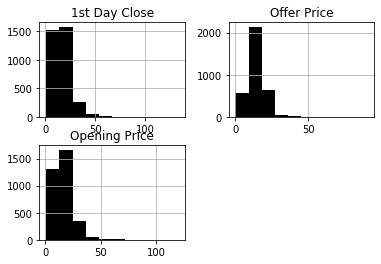

In [0]:
figsize=(20,4)
features = ['Offer Price', 'Opening Price', '1st Day Close']
ipos[features].hist(color='k')

Thanks to these 3 histograms, we identify that the dataset contains some high outliers. We will need to look deeper into this issue in the preprocessing step. 

In [0]:
ipos['1st Day % Px Chng '].describe()

count    3414.000000
mean       13.122263
std        27.343265
min       -41.080000
25%         0.000000
50%         4.045000
75%        19.307500
max       353.850000
Name: 1st Day % Px Chng , dtype: float64

In [0]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.78,2.25,2.06,2,NaN,-0.19,-1.853659
1,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.61,-0.13,-2.59,1,NaN,-2.46,-20.707071
2,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.00,1.50,4.00,2,NaN,2.50,21.739130
3,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.00,20.00,31.00,3,NaN,11.00,27.500000
4,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.57,0.03,0.06,1,NaN,0.03,0.271985


In [0]:
ipos['% Chg Open to Close'].describe()

count    3415.000000
mean        1.311072
std        11.182848
min       -98.522167
25%        -2.890110
50%         0.000000
75%         4.000000
max       159.417476
Name: % Chg Open to Close, dtype: float64

The minimal value in % Chg Open to Close is too low and thus seems very unlikely. We need to check on the row if it is the correct value.

In [0]:
ipos[ipos["% Chg Open to Close"] < -98]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
772,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,0.09,0.22,1,NaN,-6.0,-98.522167


As a matter of fact, the $ Chg Opening was skewed in our dataset, which had a very negative impact on the % Chg Open to Close.

In [0]:
ipos.loc[772, '$ Chg Opening'] = .09

In [0]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [0]:
ipos['% Chg Open to Close'].describe()

count    3415.000000
mean        1.340547
std        11.051519
min       -49.281222
25%        -2.887139
50%         0.000000
75%         4.000000
max       159.417476
Name: % Chg Open to Close, dtype: float64

In [0]:
ipos[ipos["% Chg Open to Close"] < -45]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
134,2000-08-09,Repeater Technologies,RPTR,US Bancorp Piper Jaffray,9.00,17.00,8.75,-2.78,8.00,-0.25,4,NaN,-8.25,-48.529412
1596,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1,NaN,-10.97,-49.281222


In [0]:
ipos.loc[127, '$ Chg Opening'] = .01
ipos.loc[127, 'Opening Price'] = 11.26

In [0]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [0]:
ipos['% Chg Open to Close'].describe()

count    3415.000000
mean        1.354486
std        11.142555
min       -49.281222
25%        -2.887139
50%         0.000000
75%         4.000000
max       159.417476
Name: % Chg Open to Close, dtype: float64

In [0]:
ipos.sort_values('% Chg Open to Close')

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
1596,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1,NaN,-10.97,-49.281222
134,2000-08-09,Repeater Technologies,RPTR,US Bancorp Piper Jaffray,9.00,17.00,8.75,-2.78,8.00,-0.25,4,NaN,-8.25,-48.529412
1809,2011-07-20,Zillow,Z,Citi,20.00,60.00,35.77,78.85,40.00,15.77,3,NaN,-24.23,-40.383333
3242,2019-04-03,Ruhnn Holding,RUHN,Citigroup/ UBS Investment Bank,12.50,12.50,7.85,-37.20,0.00,-4.65,1,NaN,-4.65,-37.200000
3347,2019-08-01,Sundial Growers,SNDL,Cowen/ BMO Capital Markets/ Barclays,13.00,13.01,8.48,-34.77,0.01,-4.52,2,Missed,-4.53,-34.819370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2000-08-09,H Power,HPOW,Lehman Brothers,16.00,11.26,27.00,68.75,0.01,11.00,3,NaN,10.99,97.602131
139,2000-08-10,Evolve Software,EVLV,Credit Suisse First Boston,9.00,9.00,18.00,100.00,0.00,9.00,3,NaN,9.00,100.000000
3056,2018-05-24,Scholar Rock Holding,SRRK,Jefferies/ Cowen/ BMO Capital Markets,14.00,14.25,15.50,10.71,0.25,15.00,1,NaN,14.75,103.508772
2433,2014-09-12,ReWalk Robotics,RWLK,Barclays/ Jefferies,12.00,12.00,25.60,113.33,0.00,13.60,1,NaN,13.60,113.333333


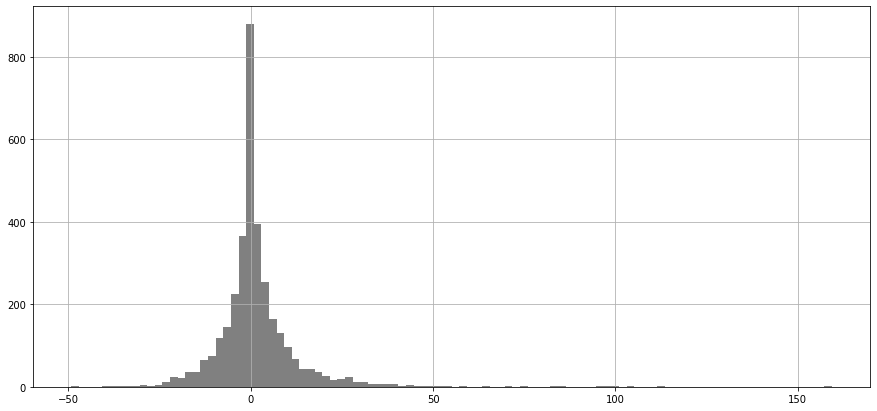

In [0]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [0]:
ipos[ipos['Date']>='2019-01-01']['% Chg Open to Close'].describe()

count    208.000000
mean       1.695266
std       12.913323
min      -37.200000
25%       -2.831439
50%        0.000000
75%        4.555961
max       64.450000
Name: % Chg Open to Close, dtype: float64

In [0]:
ipos[ipos['Date']>='2019-01-01']['$ Chg Open to Close'].sum()

59.32

In [0]:
ipos[(ipos['Date']>='2019-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    97.000000
mean      1.829175
std       3.031083
min       0.010000
25%       0.110000
50%       0.900000
75%       1.910000
max      19.750000
Name: $ Chg Open to Close, dtype: float64

In [0]:
ipos[(ipos['Date']>='2019-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    87.000000
mean     -1.357586
std       1.820219
min     -10.000000
25%      -1.860000
50%      -0.660000
75%      -0.080000
max      -0.010000
Name: $ Chg Open to Close, dtype: float64

STEP 3 : Feature Engineering

In this step, I will use another dataset (SP ranking from 2000 to 2019) in order to create new features. I will also combine former features to get new ones. 

In [0]:
sp = pd.read_csv('sp.csv')
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,1464.469971,1472.420044,1458.189941,1469.250000,1469.250000,374050000
1,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
3,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
4,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
5,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
6,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
7,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
8,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000
9,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000


In [0]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [0]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2009-08-01
error 2013-11-16
error 2015-02-21
error 2015-02-21
error 2019-02-24


Here we have 5 errors because the date on the SP dataset is not corresponding to the date on the ipos dataset. We need to fix this issue before proceeding. 

In [0]:
ipos[ipos["Date"] == "2009-08-01"]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1507,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.5,16.52,10.13,2.5,1.52,3,NaN,-0.98,-5.6,NaN


In [0]:
ipos.loc[1507, 'Date'] = pd.to_datetime('2009-08-12')

In [0]:
ipos[ipos["Date"] == "2013-11-16"]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
2213,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2.0,-0.19,3,NaN,-2.19,-11.837838,NaN


In [0]:
ipos.loc[2213, 'Date'] = pd.to_datetime('2013-11-06')

In [0]:
ipos[ipos["Date"] == "2015-02-21"]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
2547,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,1,NaN,0.19,1.853659,NaN
2548,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,1,NaN,0.75,3.947368,NaN


In [0]:
ipos.loc[2547, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[2548, 'Date'] = pd.to_datetime('2015-05-21')

In [0]:
ipos[ipos["Date"] == "2019-02-24"]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
3224,2019-02-24,TCR2 Therapeutic,TCRR,Jefferies/ Leerink Partners/ BMO Capital Markets,15.0,15.15,15.07,0.47,0.15,0.07,1,NaN,-0.08,-0.528053,NaN


In [0]:
ipos.loc[3224, 'Date'] = pd.to_datetime('2019-02-13')

In [0]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [0]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,1464.469971,1472.420044,1458.189941,1469.250000,1469.250000,374050000
1,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
3,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
4,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
...,...,...,...,...,...,...,...
5011,2019-12-02,3143.850098,3144.310059,3110.780029,3113.870117,3113.870117,3268740000
5012,2019-12-03,3087.409912,3094.969971,3070.330078,3093.199951,3093.199951,3653390000
5013,2019-12-04,3103.500000,3119.379883,3102.530029,3112.760010,3112.760010,3695030000
5014,2019-12-05,3119.209961,3119.449951,3103.760010,3117.429932,3117.429932,3355750000


In [0]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [0]:
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

In [0]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.78,2.25,2.06,2,NaN,-0.19,-1.853659,-1.377256,0.000000
1,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.61,-0.13,-2.59,1,NaN,-2.46,-20.707071,-0.902808,0.000000
2,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.00,1.50,4.00,2,NaN,2.50,21.739130,-0.902808,0.000000
3,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.00,20.00,31.00,3,NaN,11.00,27.500000,-0.902808,0.000000
4,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.57,0.03,0.06,1,NaN,0.03,0.271985,-0.902808,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,2019-11-21,SiTime,SITM,Barclays/ Stifel,13.0,16.90,18.65,43.46,3.90,5.65,1,Missed,1.75,10.355030,2.024765,0.000966
3411,2019-11-22,Alpine Income Property Trust,PINE,Raymond James/Baird/B. Riley FBR/BMO Capital M...,19.0,19.00,19.00,0.00,0.00,0.00,1,NaN,0.00,0.000000,2.172137,0.253577
3412,2019-11-22,PropTech Acquisition,PTACU,Cantor,10.0,10.10,10.11,1.10,0.10,0.11,1,NaN,0.01,0.099010,2.172137,0.253577
3413,2019-11-22,CHP Merger,CHPMU,J.P. Morgan/ Credit Suisse/ Morgan Stanley,10.0,10.04,10.05,0.50,0.04,0.05,1,NaN,0.01,0.099602,2.172137,0.253577


In [0]:
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Mangager'].map(lambda x: x.split('/')[0])

In [0]:
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [0]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

A.G. Edwards
A.G. Edwards & Sons
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Anderson & Strudrick
Axiom
Axiom Capital Management
B. Riley FBR
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Baird
Baird. BMO Capital Markets. Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
Bear. Stearns
Benchmark
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg. Towbin
CE Unterberg Towbin
CIBC Capital Markets
CIBC World Markets
CIBC Worldwide
CICC
CRT Capital
CRT Capital Group
CS First Boston
CSFB
CSFirst Boston
Canaccord Genuity
Cantor
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Capital Growth Financial
Casimir Capital
Chardan
Chardan Capital Ma

In [0]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [0]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Banc of America
Barclays
Bear Stearns
Benchmark
BofA Merrill Lync
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg. Towbin
CE Unterberg Towbin
CIBC
CICC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
Craig-Hallum Capital Group
Credit Suiss
DA Davidson
DBAB
DLJ
DPO (Direct Public Offering)
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson Lufkin & Jenrette
Donaldson. Lufkin & Jenrette
Dougherty & Company
EarlyBirdCapital
Equity Securities
Evercore ISI
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
First Van Kasper
Friedman Billings Ramsey
GS
Gilford Securi

In [0]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Mangager'].map(lambda x: len(x.split('/')))

In [0]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})

In [0]:
ipos['Month'] = ipos['Date'].map(lambda x: x.month)

In [0]:
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [0]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.78,2.25,2.06,2,NaN,-0.19,-1.853659,-1.377256,0.000000,Lehman Brothers,1,Fri,May
1,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.61,-0.13,-2.59,1,NaN,-2.46,-20.707071,-0.902808,0.000000,WR Hambrecht+Co.,1,Thurs,May
2,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.00,1.50,4.00,2,NaN,2.50,21.739130,-0.902808,0.000000,Morgan Stanley,1,Thurs,May
3,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.00,20.00,31.00,3,NaN,11.00,27.500000,-0.902808,0.000000,CSFB,1,Thurs,May
4,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.57,0.03,0.06,1,NaN,0.03,0.271985,-0.902808,0.000000,Donaldson Lufkin & Jenrette,1,Thurs,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,2019-11-21,SiTime,SITM,Barclays/ Stifel,13.0,16.90,18.65,43.46,3.90,5.65,1,Missed,1.75,10.355030,2.024765,0.000966,Barclays,2,Thurs,Nov
3411,2019-11-22,Alpine Income Property Trust,PINE,Raymond James/Baird/B. Riley FBR/BMO Capital M...,19.0,19.00,19.00,0.00,0.00,0.00,1,NaN,0.00,0.000000,2.172137,0.253577,Raymond James,4,Fri,Nov
3412,2019-11-22,PropTech Acquisition,PTACU,Cantor,10.0,10.10,10.11,1.10,0.10,0.11,1,NaN,0.01,0.099010,2.172137,0.253577,Cantor Fitzgerald,1,Fri,Nov
3413,2019-11-22,CHP Merger,CHPMU,J.P. Morgan/ Credit Suisse/ Morgan Stanley,10.0,10.04,10.05,0.50,0.04,0.05,1,NaN,0.01,0.099602,2.172137,0.253577,JP Morgan,3,Fri,Nov


In [0]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100

In [0]:
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [0]:
ipos.head(20)

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,25.78,2.25,2.06,...,-0.19,-1.853659,-1.377256,0.000000,Lehman Brothers,1,Fri,May,21.951220,-1.853659
1,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-21.61,-0.13,-2.59,...,-2.46,-20.707071,-0.902808,0.000000,WR Hambrecht+Co.,1,Thurs,May,-1.094276,-20.707071
2,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,40.00,1.50,4.00,...,2.50,21.739130,-0.902808,0.000000,Morgan Stanley,1,Thurs,May,13.043478,21.739130
3,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,155.00,20.00,31.00,...,11.00,27.500000,-0.902808,0.000000,CSFB,1,Thurs,May,50.000000,27.500000
4,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.57,0.03,0.06,...,0.03,0.271985,-0.902808,0.000000,Donaldson Lufkin & Jenrette,1,Thurs,May,0.271985,0.271985
5,2000-05-19,CoolSavings.com,CSAV,Chase H&Q,7.0,7.00,5.53,-20.98,0.00,-1.47,...,-1.47,-21.000000,-1.891576,0.000000,Chase H&Q,1,Fri,May,0.000000,-21.000000
6,2000-05-19,PixelWorks,PXLW,Salomon Smith Barney,10.0,11.25,10.89,8.91,1.25,0.89,...,-0.36,-3.200000,-1.891576,0.000000,Salomon Smith Barney,1,Fri,May,11.111111,-3.200000
7,2000-05-19,Parthus Technologies,PRTH,Goldman. Sachs,12.6,20.00,20.81,65.18,7.40,8.21,...,0.81,4.050000,-1.891576,0.000000,Goldman Sachs,1,Fri,May,37.000000,4.050000
8,2000-05-23,Integrated Circuit Systems,ICST,Credit Suisse First Boston,13.0,13.00,12.00,-7.69,0.00,-1.00,...,-1.00,-7.692308,-4.599355,0.000000,CSFB,1,Tues,May,0.000000,-7.692308
9,2000-05-24,Universal Compression Holdings,UCO,Merrill Lynch,22.0,23.25,22.06,0.28,1.25,0.06,...,-1.19,-5.118280,-5.007990,0.000000,Merrill Lynch,1,Wed,May,5.376344,-5.118280


STEP 4 : Preprocessing

Patsy is a Python library for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. Patsy brings the convenience of R “formulas” to Python.

In this project, I will use Patsy and its function dmatrix in order to turn categorical data into numeric data. This process can also be realized via an encoder : Label Encoder or OneHotEncoder. If we did not care about distance between numeric values, we would have used a Label Encoder. Otherwise, we should have used a OneHotEncoder.

In [0]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
                  Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
                  Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')

In [0]:
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,21.951220,2.25,8.0,10.25,0.000000,-1.377256
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,-1.094276,-0.13,12.0,11.88,0.000000,-0.902808
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,13.043478,1.50,10.0,11.50,0.000000,-0.902808
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,50.000000,20.00,20.0,40.00,0.000000,-0.902808
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.271985,0.03,11.0,11.03,0.000000,-0.902808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,23.076923,3.90,13.0,16.90,0.000966,2.024765
3411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.000000,0.00,19.0,19.00,0.253577,2.172137
3412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.990099,0.10,10.0,10.10,0.253577,2.172137
3413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.398406,0.04,10.0,10.04,0.253577,2.172137


We can see that Patsy has reconfigured our categorical data into multiple columns while keeping our continuous data in a single column. This is called dummy coding. In this format, each month except one will get its own column. The same is true for each broker. For example, if the particular IPO instance (row) was in May, then May will have 1 in the May column while all the other month columns are for this row. There are always n-1 feature columns for each categorical feature.


The Intercept is a column of 1 that is needed for regression models to work properly. 

In [0]:
X.head()

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,21.951220,2.25,8.0,10.25,0.0,-1.377256
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,-1.094276,-0.13,12.0,11.88,0.0,-0.902808
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,13.043478,1.50,10.0,11.50,0.0,-0.902808
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,50.000000,20.00,20.0,40.00,0.0,-0.902808
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.271985,0.03,11.0,11.03,0.0,-0.902808


Now we need to split the data into the training set and the test set. For this, the general method is to use train_test_split from sklearn.model_selection and to choose a test_size (between 0.2 and 0.3 in general). 


However,  here we are working with timeseries, that is why I am going to split the data in an usual way. 


The test set will only contain data timed in 2019. 

In [0]:
ipos[ipos["Date"]=="2019-01-08"] #first date in 2019

idx = 3207 

X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)

STEP 5 : Training and model evaluation

Now that we have a training set, we can train a model. The first model we will use is a simple Logistic Regression. 


Logistic Regression : Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

In [0]:
from sklearn.linear_model import LogisticRegression 

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
score = clf.score(X_test, y_test)
print(f'Accuracy: {score}')

Accuracy: 0.6490384615384616


In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_test, y_test, scoring="accuracy", cv=3)
scores.mean()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6679779158040028

In [0]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    895.000000
mean       0.196816
std        2.291268
min      -10.000000
25%       -0.550000
50%        0.000000
75%        0.555000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [0]:
pred_label = clf.predict(X_test)

In [0]:
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [0]:
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [0]:
rf

,index,$ chg,predicted,actual,correct
0,3207,1.64,0,1,0
1,3208,0.01,0,0,1
2,3209,0.20,0,0,1
3,3210,-0.18,0,0,1
4,3211,0.05,0,0,1
...,...,...,...,...,...
203,3410,1.75,0,1,0
204,3411,0.00,0,0,1
205,3412,0.01,0,0,1
206,3413,0.01,0,0,1


In [0]:
rf[rf['predicted']==1]['$ chg'].sum()

-2.82

In [0]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].sum()

176.15

In [0]:
rf[rf['predicted']==1]['$ chg'].describe()

count    33.000000
mean     -0.085455
std       5.469206
min     -10.000000
25%      -2.800000
50%      -1.010000
75%       1.500000
max      19.750000
Name: $ chg, dtype: float64

Text(0.5, 0, 'Index')

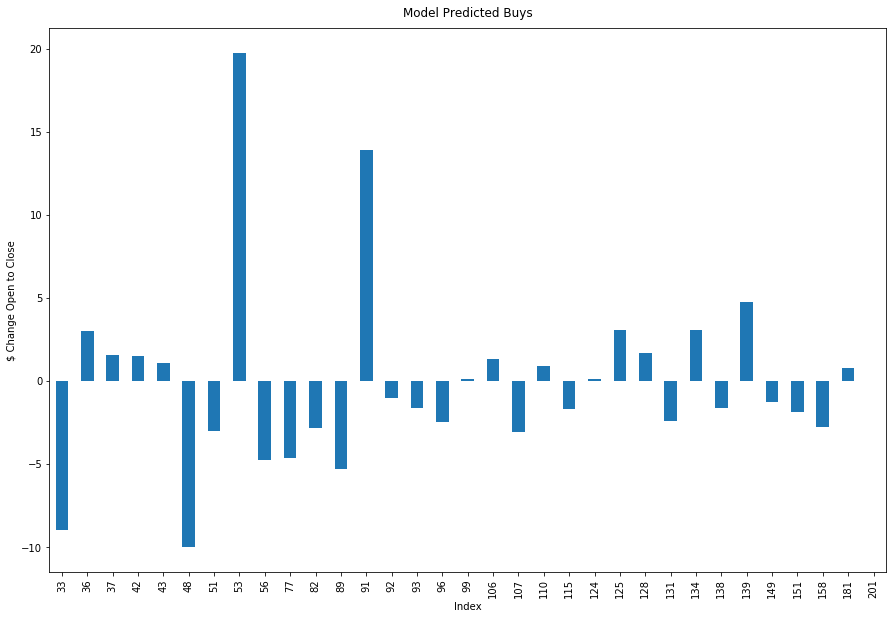

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [0]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.300211,"Q(""Lead Mgr"")[T.Robertson Stephens]"
1,1.225409,"Q(""Lead Mgr"")[T.BMO Capital Markets]"
2,0.930441,"Q(""Lead Mgr"")[T.C.E. Unterberg. Towbin]"
3,0.922693,"Q(""Lead Mgr"")[T.Donaldson Lufkin & Jenrette]"
4,0.920026,"Q(""Lead Mgr"")[T.Wachovia]"
...,...,...
174,-0.933011,"Q(""Lead Mgr"")[T.Chardan Capital Markets]"
175,-0.941617,"Q(""Lead Mgr"")[T.Feltl & Co.]"
176,-0.949096,"Q(""Lead Mgr"")[T.Cantor Fitzgerald]"
177,-1.243420,"Q(""Lead Mgr"")[T.Morgan Joseph]"


In [0]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.097768,"Q(""Week Day"")[T.Mon]"
13,0.047008,"Q(""Week Day"")[T.Thurs]"
14,-0.060116,"Q(""Week Day"")[T.Tues]"
15,-0.089674,"Q(""Week Day"")[T.Wed]"


In [0]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
131,2000-08-09,Millennium Cell,MCEL,Morgan Keegan,10.0,10.00,10.00,0.00,0.00,0.00,...,0.00,0.000000,-0.732386,0.000000,Morgan Keegan,1,Wed,Aug,0.000000,0.000000
158,2000-08-25,ServiceWare Technologies,SVCW,C.E. Unterberg. Towbin,7.0,8.50,8.75,25.00,1.50,1.75,...,0.25,2.941176,3.838051,0.000000,C.E. Unterberg. Towbin,1,Fri,Aug,17.647059,2.941176
269,2001-05-23,Smith & Wollensky,SWRG,CE Unterberg Towbin,8.5,8.51,7.77,-8.59,0.01,-0.73,...,-0.74,-8.695652,3.390612,0.000000,CE Unterberg Towbin,1,Wed,May,0.117509,-8.695652
329,2001-12-14,Northwest Biotherapeutics,NWBT,C.E. Unterberg. Towbin,5.0,5.10,5.31,6.20,0.10,0.31,...,0.21,4.117647,-1.552292,0.000000,C.E. Unterberg. Towbin,1,Fri,Dec,1.960784,4.117647
363,2002-05-21,Computer Programs and Systems,CPSI,Morgan Keegan/Raymond James,16.5,17.50,18.12,9.82,1.00,1.62,...,0.62,3.542857,2.480647,0.000000,Morgan Keegan,2,Tues,May,5.714286,3.542857
851,2005-08-04,Advanced Life Sciences,ADLS,C.E. Unterberg. Towbin/ThinkEquity Partners,5.0,5.03,6.00,20.00,0.03,1.00,...,0.97,19.284294,1.777992,0.000000,C.E. Unterberg. Towbin,2,Thurs,Aug,0.596421,19.284294
1216,2007-02-26,Rosetta Genomics,ROSG,C.E. Unterberg. Towbin,7.0,7.02,7.32,4.57,0.02,0.32,...,0.30,4.273504,0.363086,-0.010330,C.E. Unterberg. Towbin,1,Mon,Feb,0.284900,4.273504
1799,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,-0.25,0.00,...,0.25,1.694915,-3.693126,-0.003091,Morgan Keegan,1,Wed,Jun,-1.694915,1.694915


Let's try another classifier, the Random Forest Classifier. 

Random Forest Classifier : Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=5000)

In [0]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_score = clf_rf.score(X_test, y_test)
print(f'Accuracy Random Forest: {rf_score}')

Accuracy Random Forest: 0.6730769230769231


In [0]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(clf_rf, X_test, y_test, scoring="accuracy", cv=3)
rf_scores.mean()

0.7162870945479641

In [0]:
pred_label_rf = clf_rf.predict(X_test)

In [0]:
results_rf=[]
for pl, tl, idx, chg in zip(pred_label_rf, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results_rf.append([idx, chg, pl, tl, 1])
    else:
        results_rf.append([idx, chg, pl, tl, 0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [0]:
rf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [0]:
rf2.sort_values('$ chg', ascending=False)

,index,$ chg,predicted,actual,correct
53,3260,19.75,1,1,1
91,3298,13.90,1,1,1
62,3269,12.89,0,1,0
88,3295,8.84,1,1,1
44,3251,6.51,1,1,1
...,...,...,...,...,...
35,3242,-4.65,0,0,1
56,3263,-4.75,1,0,0
89,3296,-5.30,1,0,0
33,3240,-8.95,1,0,0


In [0]:
rf2[rf2['predicted']==1]['$ chg'].sum()

26.009999999999998

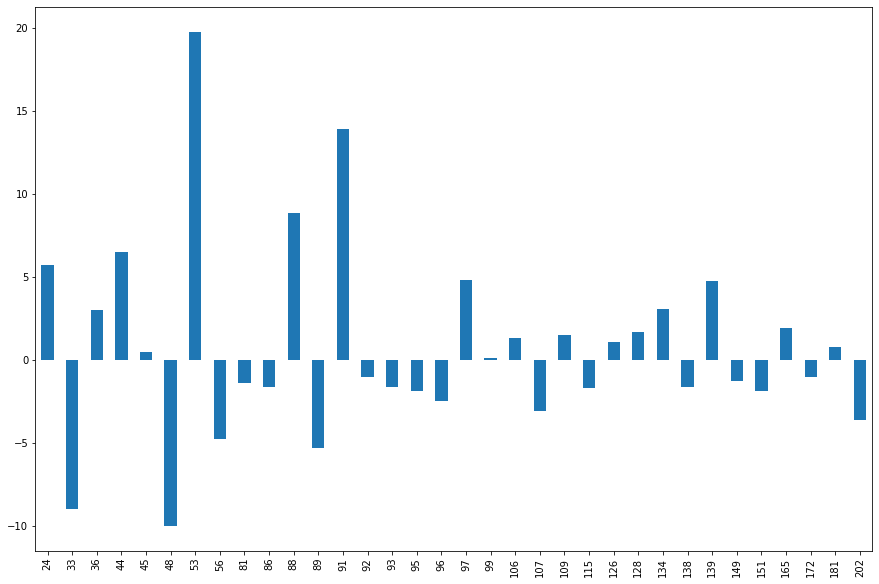

In [0]:
rf2[rf2['predicted']==1]['$ chg'].plot(kind='bar', figsize=(15,10))

For a thorougher analysis, I will use pipelines and transformers with the two precedent models. We will check whether adding transformers such as StandardScaler and Principal Component Analysis increase the results. 

StandardScaler : transform the data such that its distribution will have a mean value 0 and standard deviation of 1. It is used when the values between different columns are not at the same scale. There are other types of scalers such as MinMax Scaler or Robust Scaler. 
    

PCA (Principal Component Analysis) : reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent.

In [0]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred_lr = pipe_lr.predict(X_test)

pipe_lr_scores = cross_val_score(pipe_lr, X_test, y_test, scoring='accuracy', cv=3)
pipe_lr_scores.mean()

Test Accuracy: 0.654


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6587301587301587

In [0]:
pipe_rf = Pipeline([('scl', StandardScaler()),
            ('rf', RandomForestClassifier(n_estimators=5000))])

pipe_rf.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_rf.score(X_test, y_test))
y_pred_rf = pipe_rf.predict(X_test)

Test Accuracy: 0.668


In [0]:
from sklearn.model_selection import cross_val_score

pipe_rf_scores = cross_val_score(pipe_rf, X_test, y_test, scoring="accuracy", cv=3)
pipe_rf_scores.mean()

0.7209799861973775

As we can see, the increase is not important. 

Let's now try several other classifiers. 

KNeighborsClassifier

K-Nearest Neighbors is an algorithm used for Regression and Classification analysis. In the case of the classifier, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. In general, we use a small integer of k (between 1 and 10).

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

pipe_neighbors = Pipeline([('scl', StandardScaler()),
            ('clf_knn', KNeighborsClassifier(n_neighbors=5))])

pipe_neighbors.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_neighbors.score(X_test, y_test))

y_pred_cross_neighbors = cross_val_predict(pipe_neighbors, X_test, y_test, cv=3)

confusion_matrix(y_test, y_pred_cross_neighbors)

Test Accuracy: 0.615


array([[95, 47],
       [26, 40]])

The accuracy of the KNN model is below those of Logistic Regression and Random Forest Classifier. 

I tried to use another tool to evaluate the KNN model : a confusion matrix. 
    
In the KNN confusion matrix, we got : 94 True Negative, 48 False Positive, 26 False Negative and 40 True Negative.

With this model, we obtained a very bad precision (True Positive/(True Positive + False Positive) = 45%) and not a very good recall (True Positive/(True Positive + False Negative = 60%))

The number of False Positive is higher than the number of True Positive while the recall is not very high so I think we should not keep this model.

To compare, you will find below the confusion matrix related to the LR and RF models : 

In [0]:
from sklearn.model_selection import cross_val_predict

y_pred_cross_lr = cross_val_predict(pipe_lr, X_test, y_test, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_cross_lr)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[135,   7],
       [ 64,   2]])

In [0]:
from sklearn.model_selection import cross_val_predict

y_pred_cross_rf = cross_val_predict(pipe_rf, X_test, y_test, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_cross_rf)

array([[120,  22],
       [ 37,  29]])

Let's quickly try different models before choosing the best one to go further. 


SVC : Support Vector Classifier, classifier part of the Support Vector Machine family. 


Naive Bayes : naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features.


SGD Classifier : Stochastic Gradient Descent Classifier. While Logistic Regression uses Gradient Descent as the optimization function (to minimize the cost function), the SGD Classifier uses Stochastic Gradient Descent which converges must faster to the minimum but less precisely. 

In [0]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()),
            ('SVC', SVC(random_state=1))])

pipe_svc.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_svc.score(X_test, y_test))

svc_score = cross_val_score(pipe_svc, X_test, y_test, scoring="accuracy", cv=3)
svc_score.mean()

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Accuracy: 0.678


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6826777087646653

In [0]:
from sklearn.naive_bayes import GaussianNB

pipe_gsb = Pipeline([('scl', StandardScaler()),
            ('GSB', GaussianNB())])

pipe_gsb.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_gsb.score(X_test, y_test))

gsb_score = cross_val_score(pipe_gsb, X_test, y_test, scoring="accuracy", cv=3)
gsb_score.mean()

Test Accuracy: 0.346


0.4854382332643202

In [0]:
from sklearn.linear_model import SGDClassifier


pipe_sgd = Pipeline([('scl', StandardScaler()),
            ('SGD', SGDClassifier())])

pipe_sgd.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_sgd.score(X_test, y_test))

sgd_score = cross_val_score(pipe_sgd, X_test, y_test, scoring="accuracy", cv=3)
sgd_score.mean()

Test Accuracy: 0.591


0.6102139406487233

To sum up, Random Forest Classifier remains the best classifier for this problem and this project. We will check its results with a last tool : the ROC curve and the AUC. 


AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In [0]:
y_probas_rf = cross_val_predict(pipe_rf, X_test, y_test, cv=3,
                                    method="predict_proba")

In [0]:
from sklearn.metrics import roc_curve
y_scores_rf = y_probas_rf[:, 1] # score = proba of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,y_scores_rf)

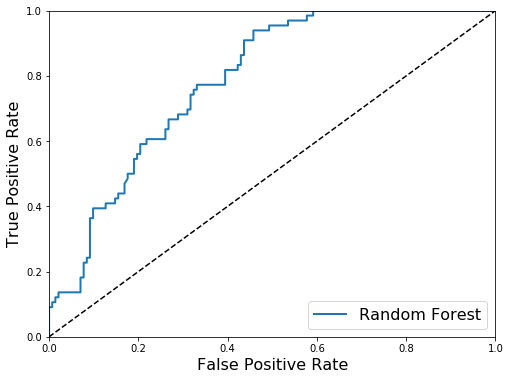

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(8, 6))

plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_test, y_scores_rf)

0.7854780196329492

STEP 5: Parameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 10000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs_rf = GridSearchCV(rf, param_grid, cv=3)

gs_rf.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [0]:
rf2 = RandomForestClassifier(criterion='gini', max_depth=6, max_features='auto', n_estimators=200)

rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf2.score(X_test, y_test)
scores = cross_val_score(rf2, X_test, y_test, scoring="accuracy", cv=3)
scores.mean()

0.7308488612836439

We slightly improved our results with a simple Grid Search which looked for an optimization of different hyperparameters. 

To recall, in machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. This means that the value of a hyperparameter is not computed via the dataset but chosen (at the opposite of a parameter). 


STEP 7 : Most important feature analysis 

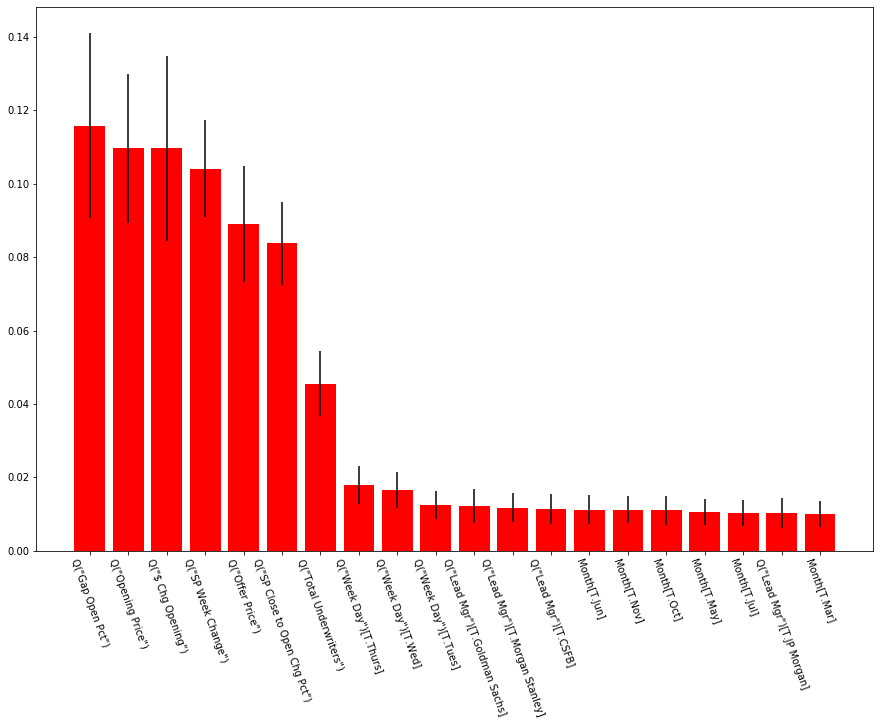

In [0]:
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);

This histogram indicates which variables influenced most the results of our models. 

HOW TO FINALLY IMPROVE OUR RESULTS?

In order to improve the performance of the RandomForestClassifier, we might add some new features. For example, we could add the Issuer business sector. As a matter of fact, Technology companies tend to have higher levels of underpricing when they go public that is why in several studies there is a Technology variable which indicates whether the company belongs to the technology industry or not.

Another important feature that we should add might be the prestige related to the underwriter company.

The problem with developing algorithms to determine underpricing is dealing with noisy, complex, and unordered data sets. Additionally, people, environment, and various environmental conditions introduce irregularities in the data.

To resolve these issues, we might use Artificial Neural Networks with backpropagation in order to decrease error rates in the test set.